# This is a notebook of fuzzy architecture used in the final project

The title of this research is "Decision Support System for Environmental Condition Analysis in Mobile-Based Hydroponic Gardens Using Fuzzy Logic" where the fuzzy used is the Takagi-Sugeno-kang method or often also called Sugeno.

## Fuzzy Membership Function Preparation

This block imports required modules and defines the linguistic variables and their membership functions for pH, TDS, water temperature, and output (environmental condition) using the Takagi-Sugeno-Kang (Sugeno) fuzzy logic method.

In [1]:
import numpy as np
from fuzzy import PH_RANGES, TDS_RANGES, TEMPERATURE_RANGES, OUTPUT_RANGES, membership_function, explode_array

# Variabel linguistik
x_ph = np.linspace(0, 14, 2000)
x_tds = np.linspace(0, 3000, 2000)
x_temp = np.linspace(0, 45, 2000)
x_output = np.linspace(0, 3, 2000)

# Keanggotaan pH
ph_acidic = membership_function(x_ph, explode_array(PH_RANGES["Asam"]))
ph_neutral = membership_function(x_ph, explode_array(PH_RANGES["Optimal"]))
ph_alkali = membership_function(x_ph, explode_array(PH_RANGES["Basa"]))

# Keanggotaan TDS
tds_lowest = membership_function(x_tds, explode_array(TDS_RANGES["Sangat Rendah"]))
tds_low = membership_function(x_tds, explode_array(TDS_RANGES["Rendah"]))
tds_medium = membership_function(x_tds, explode_array(TDS_RANGES["Optimal"]))
tds_high = membership_function(x_tds, explode_array(TDS_RANGES["Tinggi"]))

# Keanggotaan Suhu
temp_cold = membership_function(x_temp, explode_array(TEMPERATURE_RANGES["Dingin"]))
temp_normal = membership_function(x_temp, explode_array(TEMPERATURE_RANGES["Optimal"]))
temp_hot = membership_function(x_temp, explode_array(TEMPERATURE_RANGES["Panas"]))

# Keanggotaan Output
output_not_normal = membership_function(x_output, explode_array(OUTPUT_RANGES["Tidak Normal"]))
output_normal = membership_function(x_output, explode_array(OUTPUT_RANGES["Normal"]))

/Users/khoirul/PycharmProjects/final_project/fuzzy.py:70: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(np.minimum(np.minimum((x - a) / (b - a), 1), (d - x) / (d - c)), 0)
/Users/khoirul/PycharmProjects/final_project/fuzzy.py:70: RuntimeWarning: invalid value encountered in divide
  return np.maximum(np.minimum(np.minimum((x - a) / (b - a), 1), (d - x) / (d - c)), 0)


## Plotting Membership Functions

This block visualizes the membership functions for each variable (pH, TDS, water temperature, and environmental condition) using Matplotlib. Each subplot shows the degree of membership for the respective linguistic terms.

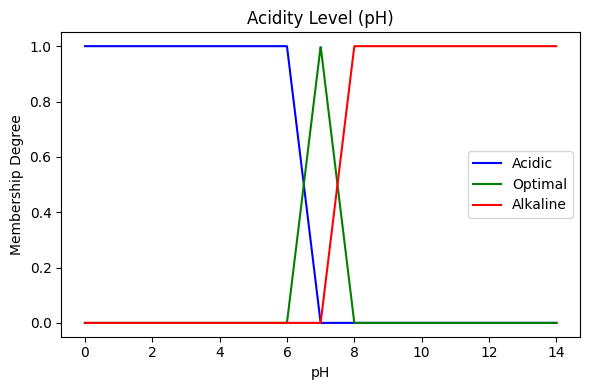

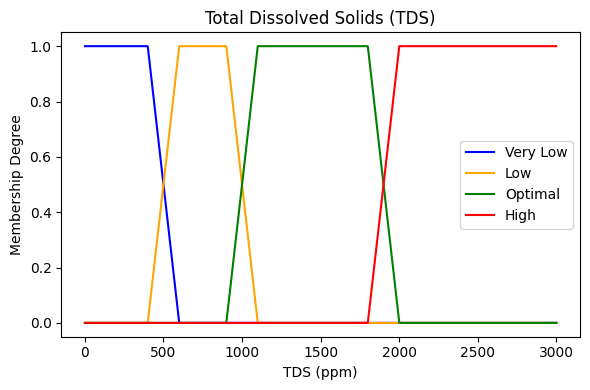

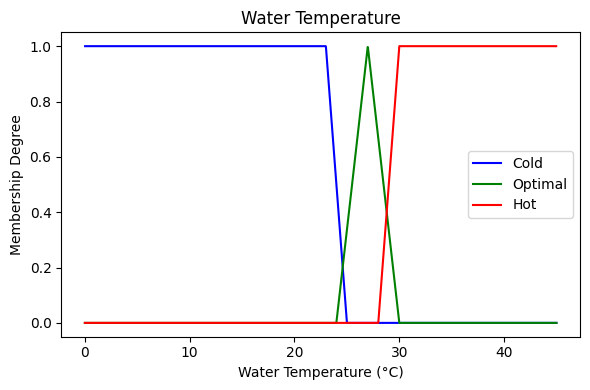

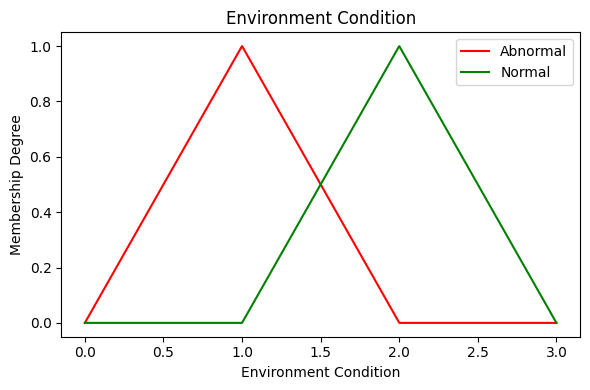

In [2]:
from save_image import plot_and_save_membership_functions

# Plotting pH Membership Functions
plot_and_save_membership_functions(
    x_ph, ph_acidic, ph_neutral, ph_alkali,
    x_tds, tds_lowest, tds_low, tds_medium, tds_high,
    x_temp, temp_cold, temp_normal, temp_hot,
    x_output, output_not_normal, output_normal
)


## Fuzzy Output Calculation and Data Preparation

This block loads the raw data, applies the fuzzy membership functions to each row, determines the fuzzy output using the defined rules, and saves the results (including predicted categories) to a new CSV file inside `./data/raw` directory.

In [3]:
import pandas as pd
from datetime import datetime
from fuzzy import tds_membership, ph_membership, temp_membership, fuzzy_rules, defuzzification, get_z_result

# Load data
file_path = 'data/final_data.csv'
data = pd.read_csv(file_path, delimiter=';')


# Fungsi untuk mengevaluasi output fuzzy
def fuzzy_output(row):
    x1 = row['tds']
    x2 = row['ph']
    x3 = row['water_temp']

    # Tentukan keanggotaan
    tds_mf = tds_membership(x1)
    ph_mf = ph_membership(x2)
    temp_mf = temp_membership(x3)

    rules = fuzzy_rules(x1=tds_mf, x2=ph_mf, x3=temp_mf)
    return defuzzification(rules).__ceil__()


# test with single data
ph = 6.8
tds = 1250
temp = 28

ph_result = ph_membership(ph)
tds_result = tds_membership(tds)
temp_result = temp_membership(temp)

rule_result = fuzzy_rules(x1=tds_result, x2=ph_result, x3=temp_result)

print('ph:', ph_result)
print('tds:', tds_result)
print('temp:', temp_result)

print('ph category:', max(ph_result, key=ph_result.get))
print('tds category:', max(tds_result, key=tds_result.get))
print('temp category:', max(temp_result, key=temp_result.get))

output = defuzzification(rule_result)

print(output)

# Add columns for pH, TDS, and water temperature
data['ph_range_result'] = data['ph'].apply(lambda x: max(ph_membership(x), key=ph_membership(x).get))
data['tds_range_result'] = data['tds'].apply(lambda x: max(tds_membership(x), key=tds_membership(x).get))
data['temp_range_result'] = data['water_temp'].apply(
    lambda x: max(temp_membership(x), key=temp_membership(x).get))

data['z_final'] = data.apply(get_z_result, axis=1)

data['normal'] = data.apply(fuzzy_output, axis=1)

raw_file_name = f"./data/raw/raw_data_{datetime.now()}.csv"

data.to_csv(raw_file_name, index=False, sep=';')
data.head(1000)

ph: {'Asam': np.float64(0.20000000000000018), 'Optimal': np.float64(0.7999999999999998), 'Basa': 0}
tds: {'Sangat Rendah': 0, 'Rendah': 0, 'Optimal': 1, 'Tinggi': 0}
temp: {'Dingin': 0, 'Optimal': np.float64(0.6666666666666666), 'Panas': 0}
ph category: Optimal
tds category: Optimal
temp category: Optimal
1.77


,time,water_temp,tds,ph,ph_range,tds_range,temp_range,ph_range_result,tds_range_result,temp_range_result,z_final,normal
0,04:30:06,26.31250,1341.61816,6.93194,Optimal,Optimal,Optimal,Optimal,Optimal,Optimal,1.92,2
1,04:32:05,26.31250,1348.20923,6.92839,Optimal,Optimal,Optimal,Optimal,Optimal,Optimal,1.91,2
2,04:34:07,26.30938,1347.81873,6.92907,Optimal,Optimal,Optimal,Optimal,Optimal,Optimal,1.92,2
3,04:36:05,10.97500,2099.02783,6.92740,Optimal,Optimal,Dingin,Optimal,Tinggi,Dingin,1.00,1
4,04:38:05,18.61875,1266.40393,6.92659,Optimal,Optimal,Dingin,Optimal,Optimal,Dingin,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
371,20:00:28,29.84063,1372.60376,6.91804,Optimal,Optimal,Optimal,Optimal,Optimal,Panas,1.05,2
372,20:05:08,29.79375,1372.53674,6.91860,Optimal,Optimal,Optimal,Optimal,Optimal,Panas,1.06,2
373,20:07:24,29.73125,1375.42212,6.91816,Optimal,Optimal,Optimal,Optimal,Optimal,Panas,1.08,2
374,20:09:20,29.70938,1374.55688,6.91836,Optimal,Optimal,Optimal,Optimal,Optimal,Panas,1.09,2


## Data Cleaning and Labeling

This block loads the previously saved data, removes unnecessary columns, standardizes column names to lowercase, and creates a new column (`raw_normal`) to indicate if all parameters are 'Optimal'. The cleaned data is saved to a new CSV file inside `./data/result` directory.

In [6]:
import pandas as pd
from datetime import datetime

# Load data
data = pd.read_csv(raw_file_name, delimiter=';')

# Remove unnecessary columns
data = data.drop(columns=['time', 'water_temp', 'tds', 'ph'])

# Set all columns and cells to lowercase
data = data.map(lambda x: x.lower() if isinstance(x, str) else x)

# Assign a new column that contains the result of the raw data
data['raw_normal'] = data.apply(
    lambda row: 2 if row['ph_range'] == 'Optimal' and row['tds_range'] == 'Optimal' and row[
        'temp_range'] == 'Optimal' else 1,
    axis=1
)

clean_data_file_name = f"./data/result/final_data_with_fuzzy_{datetime.now()}.csv"
data.to_csv(clean_data_file_name, index=False, sep=';')

data.head(15)

,ph_range,tds_range,temp_range,ph_range_result,tds_range_result,temp_range_result,z_final,normal,raw_normal
0,optimal,optimal,optimal,optimal,optimal,optimal,1.92,2,1
1,optimal,optimal,optimal,optimal,optimal,optimal,1.91,2,1
2,optimal,optimal,optimal,optimal,optimal,optimal,1.92,2,1
3,optimal,optimal,dingin,optimal,tinggi,dingin,1.00,1,1
4,optimal,optimal,dingin,optimal,optimal,dingin,1.00,1,1
5,optimal,optimal,dingin,optimal,optimal,dingin,1.00,1,1
6,optimal,optimal,optimal,optimal,optimal,optimal,1.91,2,1
7,optimal,optimal,optimal,optimal,optimal,optimal,1.91,2,1
8,optimal,optimal,optimal,optimal,optimal,optimal,1.91,2,1
9,optimal,optimal,dingin,optimal,optimal,dingin,1.00,1,1


# Fuzzy Evaluation Section

This section evaluates the performance of the fuzzy logic system by comparing the predicted categories with the actual categories for each parameter (pH, TDS, Water Temperature, and Environmental Condition).

For each parameter, the following steps are performed:
- The actual and predicted columns are compared.
- A confusion matrix is generated with the following components:
    - True Positive (TP): The number of cases where both the actual and predicted category is 'Optimal'.
    - False Negative (FN): The number of cases where the actual category is 'Optimal' but the prediction is not.
    - False Positive (FP): The number of cases where the actual category is not 'Optimal' but the prediction is 'Optimal'.
    - True Negative (TN): The number of cases where both the actual and predicted category is not 'Optimal'.
- Performance metrics are calculated:
    - Accuracy: The proportion of correct predictions (both 'Optimal' and not 'Optimal') out of all cases.
    - Precision: The proportion of correct 'Optimal' predictions out of all predicted 'Optimal' cases.
    - Recall: The proportion of correct 'Optimal' predictions out of all actual 'Optimal' cases.

The evaluation results are printed for each parameter, including the confusion matrix and performance metrics.


In [6]:
import pandas as pd
from evaluation import perform_categorical_evaluation
from IPython.display import display
import dataframe_image as dfi


def print_diagnostics(df):
    print("--- Diagnostic Information from CSV File ---")
    print(f"Delimiter used: ';'")
    print("Detected Column Names:", df.columns.tolist())
    print("-" * 40, "\n")


def evaluate_fuzzy_performance(df, column_evaluation_pairs):
    results_list = []
    for eval_name, (actual_col_name, predict_col_name) in column_evaluation_pairs.items():
        if actual_col_name not in df.columns or predict_col_name not in df.columns:
            continue
        results = perform_categorical_evaluation(df, actual_col_name, predict_col_name)
        if "error" in results:
            continue
        cm = results["confusion_matrix"]
        metrics = results["metrics"]
        results_list.append({
            "Parameter": eval_name,
            "True Positive": cm["TP"],
            "False Negative": cm["FN"],
            "False Positive": cm["FP"],
            "True Negative": cm["TN"],
            "Accuracy": metrics["Akurasi"],
            "Precision": metrics["Presisi"],
            "Recall": metrics["Recall"]
        })
    return pd.DataFrame(results_list)


def percent_format(x):
    if pd.isna(x):
        return ""
    if x == 1 or x == 0:
        return f"{int(x * 100)}%"
    return f"{x * 100:.2f}%"


def show_evaluation_result(file_name, column_pairs):
    try:
        df = pd.read_csv(file_name, sep=';')
        df.columns = [col.strip().lower() for col in df.columns]
        print_diagnostics(df)
        results_df = evaluate_fuzzy_performance(df, column_pairs)

        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        pd.set_option('display.colheader_justify', 'center')
        pd.set_option('display.expand_frame_repr', False)

        percent_cols = ['Accuracy', 'Precision', 'Recall']

        styled = (
            results_df.style
            .format({col: percent_format for col in percent_cols})
            .set_table_styles(
                [{'selector': 'th', 'props': [('text-align', 'center'), ('background-color', '#f2f2f2')]}]
            )
            .set_properties(**{'text-align': 'center'}))

        display(styled)
        # dfi.export(styled, 'images/evaluation/fuzzy_evaluation_result.png')

    except FileNotFoundError:
        print(f"❌ TOTAL FAILURE ❌\nFile '{clean_data_file_name}' not found.")
    except Exception as e:
        print(f"❌ TOTAL FAILURE ❌\nAn error occurred: {e}")


# --- Main Evaluation Block ---
# define the actual and predicted columns for each parameter
column_evaluation_pairs = {
    'pH': ('ph_range', 'ph_range_result'),
    'TDS': ('tds_range', 'tds_range_result'),
    'Water Temperature': ('temp_range', 'temp_range_result'),
    'Environmental Condition': ('raw_normal', 'normal')
}

# Show the evaluation result
result = show_evaluation_result(clean_data_file_name, column_evaluation_pairs)


--- Diagnostic Information from CSV File ---
Delimiter used: ';'
Detected Column Names: ['ph_range', 'tds_range', 'temp_range', 'ph_range_result', 'tds_range_result', 'temp_range_result', 'normal', 'raw_normal']
---------------------------------------- 



,Parameter,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall
0,pH,376,0,0,0,100%,100%,100%
1,TDS,313,1,0,62,99.73%,100%,99.68%
2,Water Temperature,58,18,0,300,95.21%,100%,76.32%
3,Environmental Condition,0,0,0,376,100%,0%,0%
